INFO:fer:30.00 fps, 916 frames, 30.53 seconds
INFO:fer:Making directories at output
  0%|                                                                                      | 0/916 [00:00<?, ?frames/s]

100%|████████████████████████████████████████████████████████████████████████████| 916/916 [05:17<00:00,  2.89frames/s]
INFO:fer:Completed analysis: saved to output\one_to_one_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 5%
INFO:fer:Compressing: 10%
INFO:fer:Compressing: 16%
INFO:fer:Compressing: 21%
INFO:fer:Compressing: 27%
INFO:fer:Compressing: 32%
INFO:fer:Compressing: 38%
INFO:fer:Compressing: 43%
INFO:fer:Compressing: 49%
INFO:fer:Compressing: 54%
INFO:fer:Compressing: 60%
INFO:fer:Compressing: 65%
INFO:fer:Compressing: 70%
INFO:fer:Compressing: 76%
INFO:fer:Compressing: 81%
INFO:fer:Compressing: 87%
INFO:fer:Compressing: 92%
INFO:fer:Compressing: 98%
INFO:fer:Zip has finished


58.35000000000008
0.0
32.880000000000244
513.3700000000006
82.29000000000006
3.269999999999985
223.78000000000043


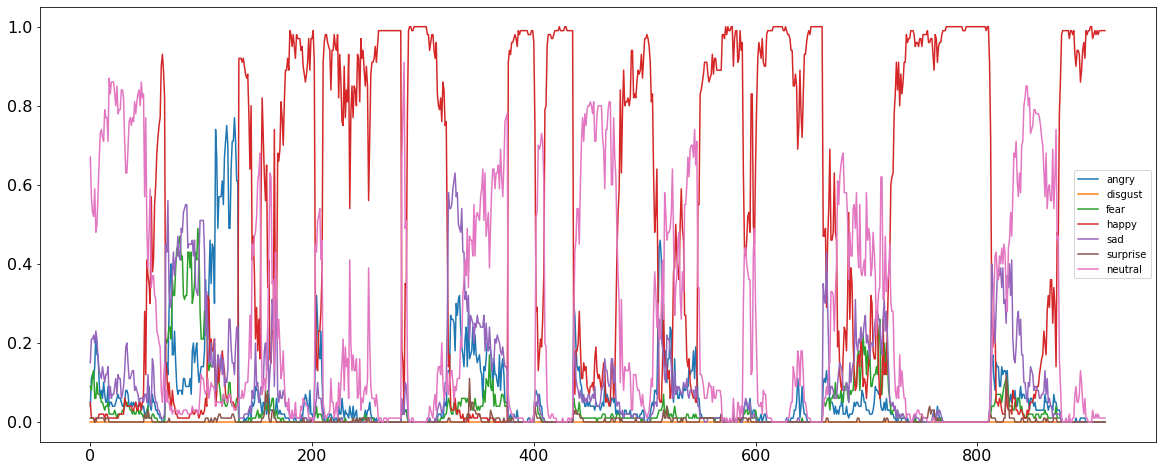

In [4]:
from fer import FER
import matplotlib.pyplot as plt 
from fer import Video
from fer import FER
import os
import sys
import pandas as pd


# Put in the location of the video file that has to be processed
location_videofile = "C:/Users/Razai/one_to_one.mp4"


# Build the Face detection detector
face_detector = FER(mtcnn=True)
# Input the video for processing
input_video = Video(location_videofile)

# The Analyze() function will run analysis on every frame of the input video. 
# It will create a rectangular box around every image and show the emotion values next to that.
# Finally, the method will publish a new video that will have a box around the face of the human with live emotion values.
processing_data = input_video.analyze(face_detector, display=False)

# We will now convert the analysed information into a dataframe.
# This will help us import the data as a .CSV file to perform analysis over it later
vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

# Plotting the emotions against time in the video
pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

# We will now work on the dataframe to extract which emotion was prominent in the video
angry = sum(vid_df.angry)
disgust = sum(vid_df.disgust)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

print(angry)
print(disgust)
print(fear)
print(happy)
print(sad)
print(surprise)
print(neutral)

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values